In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [29]:
path = "/home/philipp/Documents/boku/remote_sensing_time_series/02_exercise/data/"

d = []
idx = 0

for dist, typ in enumerate(["undisturbed", "disturbed"]):
    for i in range(1,6):
        temp = pd.read_csv("{}Sentinel-2_L2A-3_NDVI-2016_2021_{}_{}.csv".format(path,typ,i))
        temp["disturbed"] = dist
        temp["id"] = idx
        idx += 1
        d.append(temp)

In [30]:
data = pd.concat(d)

In [31]:
data

,C0/date,C0/min,C0/max,C0/mean,C0/stDev,C0/median,C0/p10,C0/p90,C0/cloudCoveragePercent,disturbed,id
0,2021-04-30T00:00:00.000Z,0.359122,0.546487,0.458594,0.062284,NaN,NaN,NaN,0,0,0
1,2021-04-20T00:00:00.000Z,0.442105,0.564150,0.509866,0.032484,NaN,NaN,NaN,0,0,0
2,2021-04-05T00:00:00.000Z,0.299465,0.381124,0.347694,0.025640,NaN,NaN,NaN,0,0,0
3,2021-03-31T00:00:00.000Z,0.551483,0.669124,0.606086,0.036346,NaN,NaN,NaN,0,0,0
4,2021-03-21T00:00:00.000Z,0.619321,0.681302,0.652600,0.018471,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
194,2017-02-15T00:00:00.000Z,0.292866,0.351068,0.328690,0.016072,NaN,NaN,NaN,0,1,9
195,2017-01-26T00:00:00.000Z,0.359331,0.401623,0.380299,0.013722,NaN,NaN,NaN,0,1,9
196,2016-12-07T00:00:00.000Z,0.335052,0.383513,0.360447,0.015070,NaN,NaN,NaN,0,1,9
197,2016-11-17T00:00:00.000Z,0.322543,0.360656,0.339589,0.012121,NaN,NaN,NaN,0,1,9


In [33]:
data.columns = ['date', 'min', 'max', 'mean', 'sd', 'median',
       'p10', 'p90', 'cloudCoveragePercent', 'disturbed', "id"]

In [48]:
data["date"] = pd.to_datetime(data["date"])

In [49]:
data[["date", "mean", "disturbed", "id"]]

,date,mean,disturbed,id
0,2021-04-30 00:00:00+00:00,0.458594,0,0
1,2021-04-20 00:00:00+00:00,0.509866,0,0
2,2021-04-05 00:00:00+00:00,0.347694,0,0
3,2021-03-31 00:00:00+00:00,0.606086,0,0
4,2021-03-21 00:00:00+00:00,0.652600,0,0
...,...,...,...,...
194,2017-02-15 00:00:00+00:00,0.328690,1,9
195,2017-01-26 00:00:00+00:00,0.380299,1,9
196,2016-12-07 00:00:00+00:00,0.360447,1,9
197,2016-11-17 00:00:00+00:00,0.339589,1,9


<AxesSubplot:xlabel='date', ylabel='mean'>

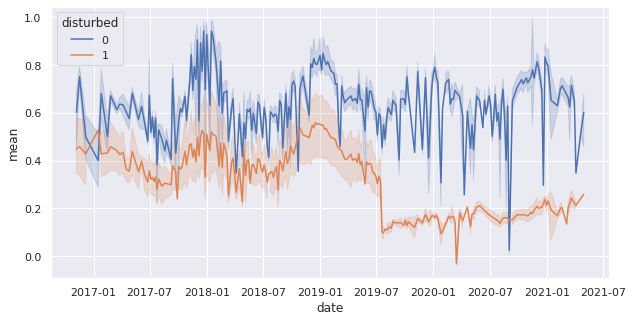

In [58]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="date", y="mean", hue="disturbed", data=data)

<AxesSubplot:xlabel='date', ylabel='mean'>

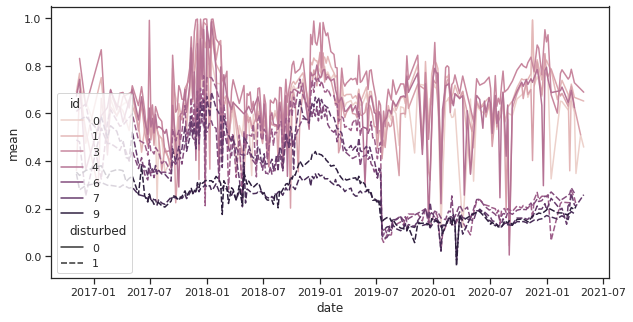

In [57]:
sns.set(rc={"figure.figsize":(10, 5)}) #width=3, #height=4
sns.set_theme(style="ticks")

# Plot the responses for different events and regions
sns.lineplot(x="date", y="mean", hue="id", style="disturbed", data=data)